#### Plotting
Using Bokeh it is possible to display all the plots in an interactive fashion and this library provides a simple way to generate a large number of default plots per file and also allows for plotting any combination of parameters. It is also possible to generate 'interactive' plots that allow you to use a slider to move through the start to end simulation.


In [1]:
import processing_tools as pt

filepath = '/home/daniel_b/Documents/Summer_project/example.h5'
FEL = pt.ProcessedData(filepath,num_slices=100,undulator_period=0.00275,k_fact=2.7)

The default plots are very easy to call and this can be done by passing a computed object into the plotting class. This is most easily done by using the ProcessedData class directly, as this ensures that all the necessary calculations will have been done. This is not necessary, and the class will allow you to do your own plotting routines on raw data, but the defaults might complain or call processing routines themselves. 

prepare_defaults() generates a standard set of plots in a dictionary called 'plots' whose keys are generally in the format 'x-axis_y-axis' where the axes are taken from the directory dictionary of the dataset. But two line plots are hard coded and only show the y axis.

In [2]:
plots = pt.Bokeh_Plotting(FEL)  #to save pngs you need 'npm install -g phantomjs-prebuilt'
plots.prepare_defaults(file_name='test')
plots.plot_defaults() #show_html=True

This generates a filename.html file that can be opened in any browser. For large datasets automatic binning will be implemented so that the raw data scatter plots do not fill up memory or make the file unusable. To create custom plots one can call custom_plot. This will overwrite the files generated above, so it is reccomended that file_name be filled in. Alternatively, don't use the same object to plot defaults and custom plots. 

In [ ]:
FEL_2 = pt.ProcessedData(filepath,num_slices=100,undulator_period=0.00275,k_fact=2.7)
plots_2 = pt.Bokeh_Plotting(FEL_2)
a = plots_2.custom_plot(x_axis='x', y_axis='y', key='pop', plotter='circle', color='pink',
                  file_name='transverse', text_color='black', legend='thing', 
                      title='Transverse position', save= True)

By importing the following modules one can show plots within the notebook, or alternatively through ipython

In [3]:
from bokeh.plotting import show
from bokeh.io import output_notebook
output_notebook()




Loading BokehJS ...

##### Interactive Plotting
And it is possible to do interactive plotting where you can scan througha simulation - the function takes in a list of filepaths/names and generates a plot which cycles through them. Due to the interactive nature this cannot be saved as a png file, but should aid with visualization. 

In [4]:
import int_plot as ip
filelist = ['/home/daniel_b/Documents/Summer_project/noise_10kSI_MASP.h5',
             '/home/daniel_b/Documents/Summer_project/noise_10kSI_MASP.h5',
             '/home/daniel_b/Documents/Summer_project/noise_10kSI_MASP.h5']

t = ip.interactive_plot(filelist,'x','y')


processing_tools.py:148: RuntimeWarning: invalid value encountered in sqrt
  self.dict['e_y'][i] = (1.0/(m*c))*np.sqrt((y_2*py_2)-(ypy*ypy))                        #
processing_tools.py:30: RuntimeWarning: divide by zero encountered in divide
  calc = np.divide(calc, emittance)
processing_tools.py:30: RuntimeWarning: invalid value encountered in divide
  calc = np.divide(calc, emittance)
processing_tools.py:267: RuntimeWarning: divide by zero encountered in double_scalars
  (2*np.pi*self.dict['std_x'][slice_no]*self.dict['std_y'][slice_no])
FEL_equations.py:95: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([gain_length*wavelength/(4*const.pi*transverse_size**2)])


(-0.0018078, 0.0022249000000000001) (-0.0019987, 0.0022006999999999999)


In [5]:
show(t)

In [6]:
files_2 = ['/home/daniel_b/Documents/Summer_project/beam50k_A2S.h5', 
           '/home/daniel_b/Documents/Summer_project/beam50k_A2S.h5',
           '/home/daniel_b/Documents/Summer_project/beam50k_A2S.h5']
y = ip.interactive_plot(files_2,'z_pos','std_y')
show(y)

(49.292097981561781, 49.29382783837255) (3.584366098016607e-05, 0.00021077645967630478)


##### Plot to PNG
And if you want to plot everything to pngs that are held with the file this can also be done by calling Panda_Plotting from Processing_Tools and passing in the Processed_Data objects. prep_plot allows you to either save or show a given plot (choosing False or True on the show parameter respectively) and to chose to plot one or two parameters as either a 'line' or 'scatter' plot. Customs labels are possible.

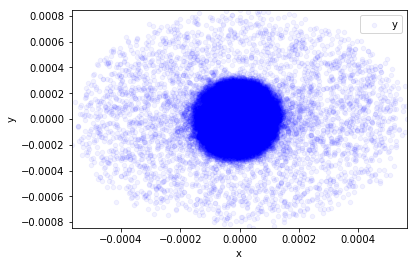

In [11]:
pngs = pt.Panda_Plotting(FEL)
pngs.prep_plot(x_axis='x', y_ax_1='y', y_ax_2=False, title=None, kind='scatter',
                  log=False, ID=None, x_label=False, y_label=False, show=True)

And again, some default plots can be quickly made by calling the function below. This saves pngs with the basefilename+_+x_axis|y_axis.png format in the folder where the file is. 

In [14]:
pngs.plot_defaults()